In [363]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
from pathlib import Path
folder = Path("./070")

- (A-2b) Identifikujte aj prvotne riešte problémy v dátach napr.: nevhodná štruktúra dát, duplicitné záznamy (riadky, stlpce), nejednotné formáty, chýbajúce hodnoty, vychýlené hodnoty. V dátach sa môžu nachádzať aj iné, tu nevymenované problémy.

In [364]:
data1 = pd.read_csv(folder / "connections.csv", delimiter="\t", parse_dates=['ts'])
data1.info()
# print(len(data1['imei'].unique()))
# data1.sort_values(['imei', 'ts']).head(20)
#print(len(data1.loc[:,['ts',"imei"]].unique()))

# in every data set where ts comulmn is present, it has to be converted to a datetime type from an object(string)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15068 entries, 0 to 15067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ts                 15068 non-null  datetime64[ns]
 1   imei               15068 non-null  int64         
 2   mwra               15068 non-null  float64       
 3   c.android.youtube  15068 non-null  float64       
 4   c.katana           15068 non-null  float64       
 5   c.dogalize         15068 non-null  float64       
 6   c.android.chrome   15068 non-null  float64       
 7   c.android.gm       15068 non-null  float64       
 8   c.UCMobile.x86     15068 non-null  float64       
 9   c.raider           15068 non-null  float64       
 10  c.android.vending  15068 non-null  float64       
 11  c.updateassist     15068 non-null  float64       
 12  c.UCMobile.intl    15068 non-null  float64       
dtypes: datetime64[ns](1), float64(11), int64(1)
memory usage: 1.5

In [365]:
data1.describe()
# we can now work with all columns in this data set as numeric

,ts,imei,mwra,c.android.youtube,c.katana,c.dogalize,c.android.chrome,c.android.gm,c.UCMobile.x86,c.raider,c.android.vending,c.updateassist,c.UCMobile.intl
count,15068,1.506800e+04,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000
mean,2018-05-10 14:03:46.122909696,3.915151e+18,0.627091,14.224016,12.933420,11.213860,11.748367,12.395181,49.691045,50.304422,49.846238,49.795751,49.805725
min,2018-05-05 10:00:00,3.590434e+17,0.000000,5.205940,3.670310,1.794050,1.332370,3.978430,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-05-07 23:58:45,8.630331e+17,0.000000,12.887115,11.041332,9.468405,9.869288,10.526928,24.404520,25.599992,24.614873,24.474610,24.732795
50%,2018-05-10 14:04:30,3.590434e+18,1.000000,14.228200,13.045560,11.071870,11.595440,12.587570,49.596390,50.565775,49.828965,49.450900,49.536500
75%,2018-05-13 04:05:15,8.630331e+18,1.000000,15.546828,14.838530,12.841680,13.576078,14.323585,74.844188,75.281260,75.347318,75.000933,74.833070
max,2018-05-15 18:08:00,8.630331e+18,1.000000,22.757320,22.669430,21.240890,22.079670,20.083960,100.000000,100.000000,100.000000,100.000000,100.000000
std,NaN,3.329756e+18,0.483594,2.016526,2.685007,2.567502,2.700146,2.509716,28.923322,28.806473,29.013212,28.962832,28.841978


In [366]:
# lets first check for missing values
data1.isna().sum()
# there are not missing values in any columns

ts                   0
imei                 0
mwra                 0
c.android.youtube    0
c.katana             0
c.dogalize           0
c.android.chrome     0
c.android.gm         0
c.UCMobile.x86       0
c.raider             0
c.android.vending    0
c.updateassist       0
c.UCMobile.intl      0
dtype: int64

In [367]:
# check for duplicates and clear them
print(f'count of duplicated rows: {len(data1.loc[data1.duplicated(), :])}')
data1_dupless = data1.loc[~data1.duplicated(), :]  # full rows

# data1.loc[~data1.duplicated(subset="c.android.youtube"), :] # duplicates only in that column


count of duplicated rows: 179


In [368]:
# we will define function for calculating outliers here
def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    
    return a[(a > upper) | (a < lower)]

# also define function that will output cont and % of outliers
def print_outliers_stat(df):
    for column in df:
        # Check if the column is numeric
        if pd.api.types.is_numeric_dtype(df[column]):
            outliers = identify_outliers(df[column])  # Assuming this is a function you've defined elsewhere
            print(f'{column}: {len(outliers)} => {(len(outliers) * 100) / len(df[column]):.2f}%')
            


In [369]:
print_outliers_stat(data1_dupless)
# by this stats we can clip the outliers
# clipping outliers
data1_dupless_clip = data1_dupless.drop(identify_outliers(data1_dupless['c.android.youtube']).index)
# data1.drop(identify_outliers(data1['c.katana']).index)

imei: 0 => 0.00%
mwra: 0 => 0.00%
c.android.youtube: 148 => 0.99%
c.katana: 47 => 0.32%
c.dogalize: 152 => 1.02%
c.android.chrome: 71 => 0.48%
c.android.gm: 8 => 0.05%
c.UCMobile.x86: 0 => 0.00%
c.raider: 0 => 0.00%
c.android.vending: 0 => 0.00%
c.updateassist: 0 => 0.00%
c.UCMobile.intl: 0 => 0.00%


In [370]:
# define function for visualising numeric data in histograms
def show_hist(df):
    for column in df.select_dtypes(include='number').columns:
        plt.figure(figsize=(5, 5))
        df[column].hist(bins=20)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()


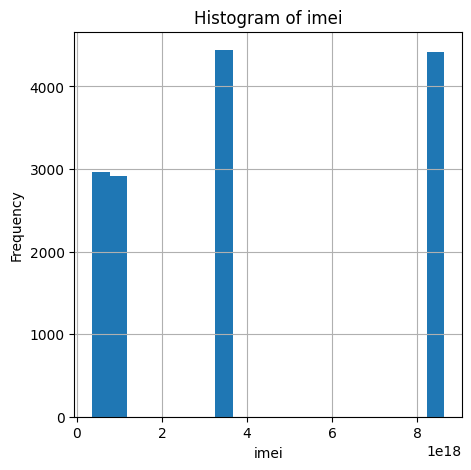

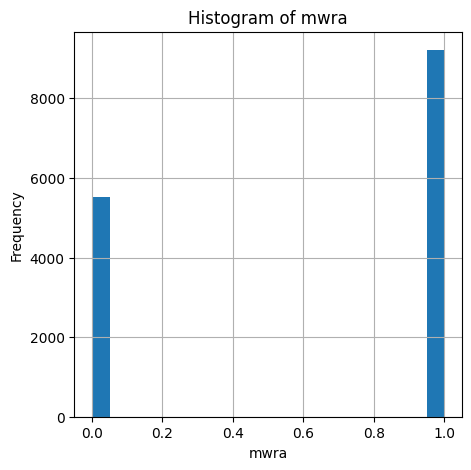

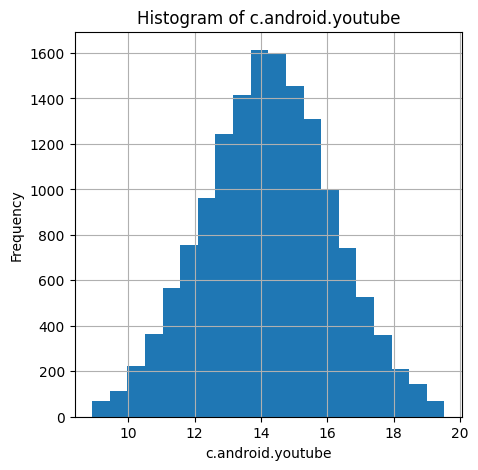

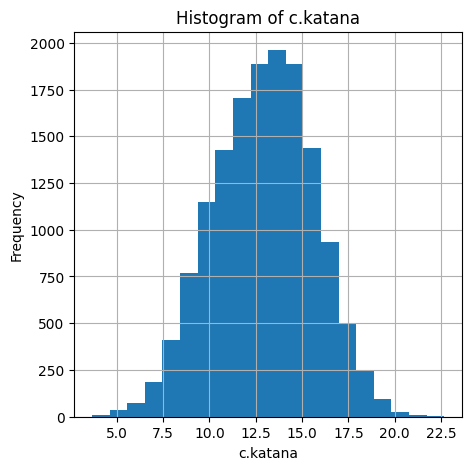

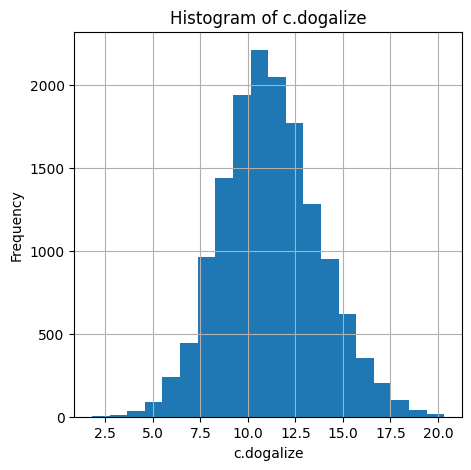

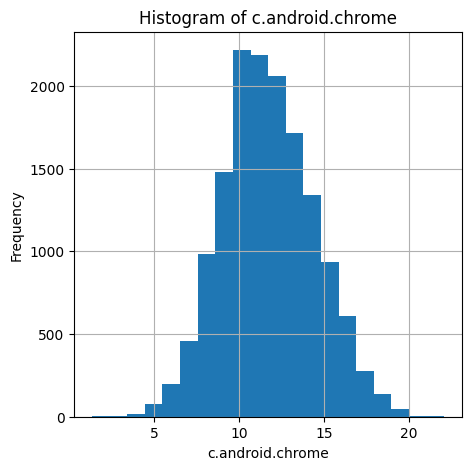

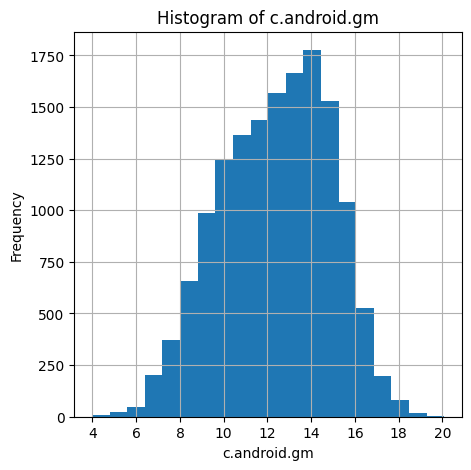

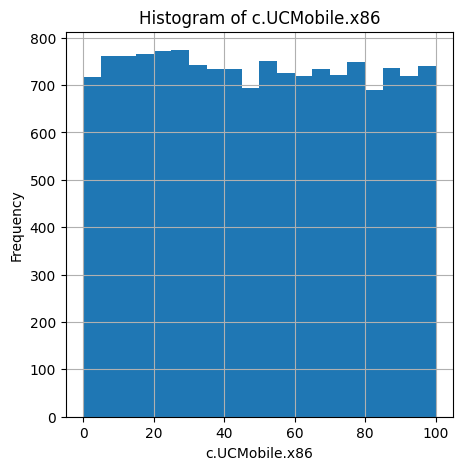

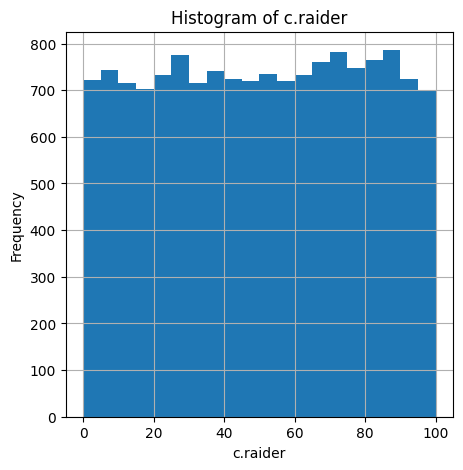

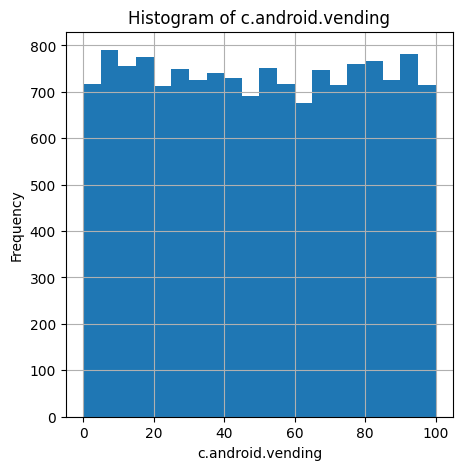

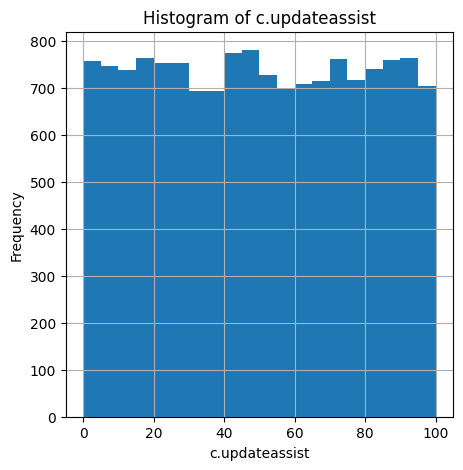

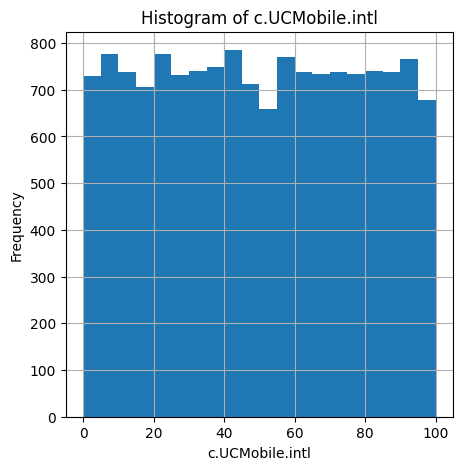

In [371]:
show_hist(data1_dupless_clip)

In [372]:
# we will now perfor the same procedure on the other 3 datasets
data2 = pd.read_csv(folder / "devices.csv", delimiter="\t")
data2.info()


# print(len(data2['imei'].unique()))
# data2.sort_values('imei').head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2889 entries, 0 to 2888
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    2889 non-null   float64
 1   longitude   2889 non-null   float64
 2   store_name  2889 non-null   object 
 3   code        2887 non-null   object 
 4   location    2889 non-null   object 
 5   imei        2889 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 135.6+ KB


In [373]:
data2.head()

,latitude,longitude,store_name,code,location,imei
0,32.50070,-94.74049,Longview,US,America/Chicago,863033069630348388
1,50.80904,8.77069,Marburg an der Lahn,DE,Europe/Berlin,359043379931766908
2,-31.95224,115.86140,Perth,AU,Australia/Perth,3590433799317662410
3,18.20854,-71.10077,Santa Cruz de Barahona,DO,America/Santo_Domingo,8630330696303481511
4,-29.29750,-51.50361,Carlos Barbosa,BR,America/Sao_Paulo,359043379931766288


In [374]:
# we can see that the code column will be categorical
# also woth the location one so lets change their type

data2['code'] = data2['code'].astype('category')
data2['location'] = data2['location'].astype('category')
data2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2889 entries, 0 to 2888
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   latitude    2889 non-null   float64 
 1   longitude   2889 non-null   float64 
 2   store_name  2889 non-null   object  
 3   code        2887 non-null   category
 4   location    2889 non-null   category
 5   imei        2889 non-null   int64   
dtypes: category(2), float64(2), int64(1), object(1)
memory usage: 112.3+ KB


In [375]:
# we can split the location even further to a continent and city columns
 
data2[['continent', 'city']] = data2['location'].str.split('/', n=1, expand=True)

#also make them categorical

data2['continent'] = data2['continent'].astype('category')
data2['city'] = data2['city'].astype('category')
data2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2889 entries, 0 to 2888
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   latitude    2889 non-null   float64 
 1   longitude   2889 non-null   float64 
 2   store_name  2889 non-null   object  
 3   code        2887 non-null   category
 4   location    2889 non-null   category
 5   imei        2889 non-null   int64   
 6   continent   2889 non-null   category
 7   city        2889 non-null   category
dtypes: category(4), float64(2), int64(1), object(1)
memory usage: 126.6+ KB


In [376]:
# dataset devices.csv has many string attributes
data2.describe() 

,latitude,longitude,imei
count,2889.000000,2889.000000,2.889000e+03
mean,28.873197,10.845267,3.948806e+18
std,23.467101,73.913804,3.347472e+18
min,-54.800000,-156.474320,3.590434e+17
25%,14.836100,-63.134140,8.630331e+17
50%,36.208290,10.302150,3.590434e+18
75%,45.539290,72.685330,8.630331e+18
max,68.798330,178.004170,8.630331e+18


In [377]:
# first we check for duplicates
print(f'count of duplicated rows: {len(data2.loc[data2.duplicated(), :])}')
data2_dupless = data2.loc[~data2.duplicated(), :]  # full rows


count of duplicated rows: 12


In [378]:
# and missing values

data2.isna().sum()

latitude      0
longitude     0
store_name    0
code          2
location      0
imei          0
continent     0
city          0
dtype: int64

In [379]:
# there are 2 missing values in code attributes lets see what they are
data2_dupless[data2_dupless['code'].isnull()]


,latitude,longitude,store_name,code,location,imei,continent,city
370,-21.98333,16.91667,Okahandja,NaN,Africa/Windhoek,863033069630348446,Africa,Windhoek
1873,-21.98333,16.91667,Okahandja,NaN,Africa/Windhoek,863033069630348123,Africa,Windhoek


In [380]:
# for the category attributes we can try grouping them and
# using aggregate functions

data2_gourp_location = data2_dupless.groupby(['city']).agg('count')
data2_gourp_location.sort_values(by='store_name', ascending=False)

# len(data2['code'].unique()) # 133 different codes

C:\Users\Asus\AppData\Local\Temp\ipykernel_22612\4019590188.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data2_gourp_location = data2_dupless.groupby(['city']).agg('count')


,latitude,longitude,store_name,code,location,imei,continent
city,,,,,,,
New_York,223,223,223,223,223,223,223
Kolkata,189,189,189,189,189,189,189
Berlin,142,142,142,142,142,142,142
Chicago,132,132,132,132,132,132,132
Moscow,111,111,111,111,111,111,111
...,...,...,...,...,...,...,...
Port_of_Spain,1,1,1,1,1,1,1
Saratov,1,1,1,1,1,1,1
Tallinn,1,1,1,1,1,1,1


In [381]:
# we can see the top 3 locations in dataset are
# US, New York = 223
# IN, Kolkata = 189
# DE, Berlin = 142
# we could even split the location string to a new columns continent, city and
# group it by city or continent

In [382]:
print_outliers_stat(data2_dupless)

latitude: 84 => 2.92%
longitude: 0 => 0.00%
imei: 0 => 0.00%


In [383]:
# we can see there are outliers in latitude
# but they are location related data se we wont clip it


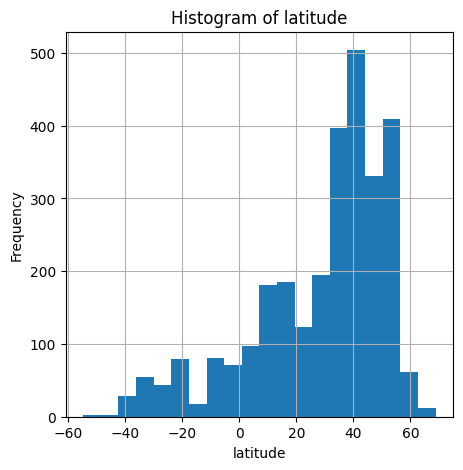

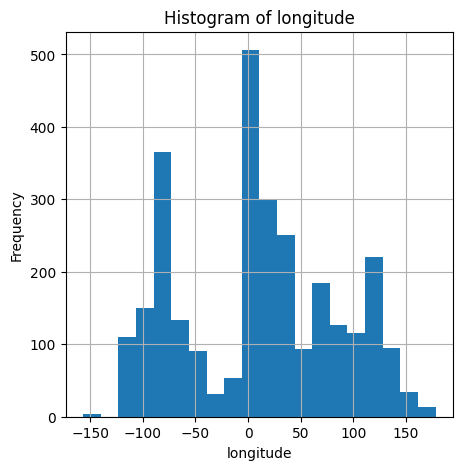

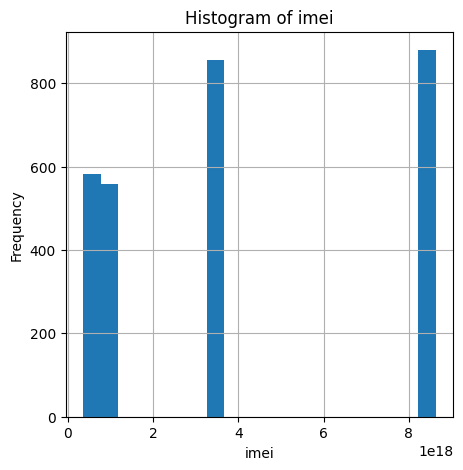

In [384]:
show_hist(data2_dupless)

In [385]:
data3 = pd.read_csv(folder / "processes.csv", delimiter="\t", parse_dates=['ts'])


In [386]:
data4 = pd.read_csv(folder / "profiles.csv", delimiter="\t")

# print(data4.shape)
# print(len(data4['imei'].unique()))

- (B-2b) Chýbajúce hodnoty (missing values): vyskúšajte riešiť problém min. 2 technikami odstránenie pozorovaní s chýbajúcimi údajmi nahradenie chýbajúcej hodnoty napr. mediánom, priemerom, pomerom, interpoláciou, alebo kNN


In [389]:
# there are missing values in dataset devices.csv
data2.isna().sum() 
# code is an object type attribute so we cant
# change the missing value to a mean or median

latitude      0
longitude     0
store_name    0
code          2
location      0
imei          0
continent     0
city          0
dtype: int64

In [390]:
# there are 2 missing values in code attributes lets see if we clip it or keep it 
data2_dupless[data2_dupless['code'].isnull()]
# we need to first add the category AC in code categories
data2_dupless['code'] = data2_dupless['code'].cat.add_categories(['AC'])


C:\Users\Asus\AppData\Local\Temp\ipykernel_22612\1190482417.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2_dupless['code'] = data2_dupless['code'].cat.add_categories(['AC'])


In [391]:

data2_dupless.loc[data2_dupless['location'] == 'Africa/Windhoek', 'code'] = 'AC'
data2_dupless.loc[data2_dupless['code'] == 'AC']

,latitude,longitude,store_name,code,location,imei,continent,city
370,-21.98333,16.91667,Okahandja,AC,Africa/Windhoek,863033069630348446,Africa,Windhoek
1873,-21.98333,16.91667,Okahandja,AC,Africa/Windhoek,863033069630348123,Africa,Windhoek


- (C-1b) Vychýlené hodnoty (outlier detection), vyskúšajte riešiť problém min. 2 technikami odstránenie vychýlených alebo odľahlých pozorovaní nahradenie vychýlenej hodnoty hraničnými hodnotami rozdelenia (napr. 5%, 95%)

In [392]:
# in dataset connections.csv there are outliers in attribute c.android.youtube
print_outliers_stat(data1_dupless)
# by this stats we can clip the outliers

imei: 0 => 0.00%
mwra: 0 => 0.00%
c.android.youtube: 148 => 0.99%
c.katana: 47 => 0.32%
c.dogalize: 152 => 1.02%
c.android.chrome: 71 => 0.48%
c.android.gm: 8 => 0.05%
c.UCMobile.x86: 0 => 0.00%
c.raider: 0 => 0.00%
c.android.vending: 0 => 0.00%
c.updateassist: 0 => 0.00%
c.UCMobile.intl: 0 => 0.00%


<Axes: xlabel='c.android.youtube', ylabel='Count'>

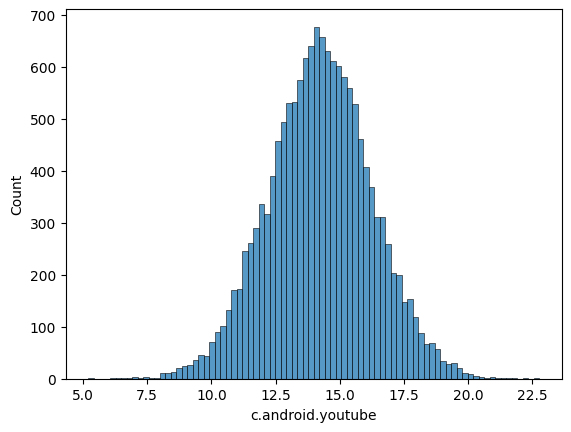

In [396]:
sns.histplot(data=data1_dupless['c.android.youtube'])

<Axes: xlabel='c.android.youtube', ylabel='Count'>

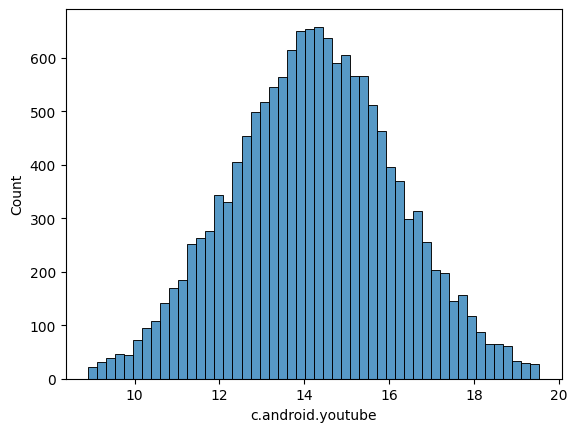

In [394]:
# clipping outliers
data1_dupless_clip = data1_dupless.drop(identify_outliers(data1_dupless['c.android.youtube']).index)
sns.histplot(data=data1_dupless_clip['c.android.youtube'])

In [400]:
# the other method would be replacing the outliers with
# limit values (whiskers) 5% and 95%
